Default Data Set

In [1]:
import pandas as pd
default = pd.read_csv('C:\\Users\\Paaru\\Desktop\\SJSU MSEE\\2nd sem - Spring 2018\\EE 259 - Intro to statistical learning\\data sets\\Default.csv', na_values='?').dropna()

In [2]:
default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [3]:
default.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


Setting default_value = 1 if Default = Yes , else 0; 
Setting student_value = 1 if student = Yes , else 0; 

In [4]:
default['default_value']=default.default.factorize()[0]
default['student_value']=default.student.factorize()[0]
default.head()

,Unnamed: 0,default,student,balance,income,default_value,student_value
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0


Dividing the data set into people who defaulted and not defaulted

In [5]:
default_yes = default[default.default_value == 1]
default_no = default[default.default_value == 0].sample(frac=0.08)

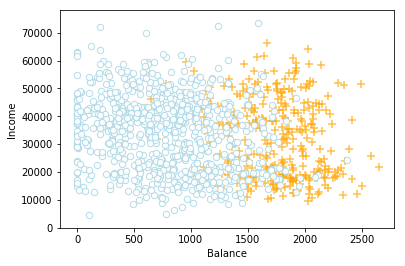

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.scatter(x = default_yes.balance, y = default_yes.income, s=60, c='orange', marker='+', linewidths=1, alpha=.7)
plt.scatter(x = default_no.balance, y = default_no.income, s=40,  marker='o', linewidths=1, edgecolors='lightblue',facecolors='white', alpha=.9)
plt.ylabel('Income')
plt.xlabel('Balance')
plt.show()

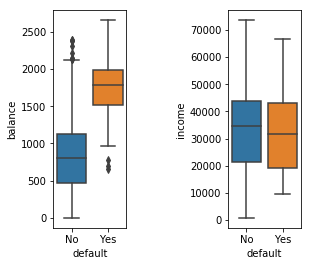

In [7]:
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
gs = mpl.gridspec.GridSpec(1, 4)
ax2 = plt.subplot(gs[0,0])
ax3 = plt.subplot(gs[0,2])
sns.boxplot('default', 'balance', data=default, orient='v',ax=ax2)
sns.boxplot('default', 'income', data=default, orient='v',ax=ax3)
plt.show()

Logistic Regression using Scikit learn

In [14]:
from sklearn.linear_model import LogisticRegression
import numpy
logisticRegr = LogisticRegression(solver='newton-cg')
X=default['balance'].values.reshape(-1,1)
y=default['default_value'].values.reshape(-1,1)
logisticRegr.fit(X, numpy.ravel(y))
print("Regression Intercept, B0 = ",logisticRegr.intercept_)
print("Regression coefficient, B1 = ",logisticRegr.coef_)

Regression Intercept, B0 =  [-10.6513229]
Regression coefficient, B1 =  [[ 0.00549891]]


Logistic Regression using Logit function from Statsmodels

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sm.add_constant(default.balance)
est = smf.Logit(y, X).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sm.add_constant(default.student_value)
est = smf.Logit(y, X).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student_value,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sm.add_constant(default[['balance','income','student_value']])
est = smf.Logit(y, X).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student_value,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


In [19]:
est.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: y                AIC:              1579.5448  
Date:               2018-03-10 13:03 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
const           -10.8690   0.4923 -22.0793 0.0000 -11.8339 -9.9042
balance           0.0057   0.0002  24.7365 0.0000   0.0053  0.0062
income            0.0000   0.0000   0.3698 0.7115  -0.0000  0.0000
student_value    -0.6468   0.2363  -2.7376 0.0062  -1.1098 -0.1837
==================================================================

"""

LDA Analysis

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
lda = LinearDiscriminantAnalysis()
X = sm.add_constant(default[['balance','income','student_value']])
y = numpy.ravel(default.default_value.values.reshape(-1,1), order='C')
pred = lda.fit(X, y).predict(X)
print("Confusion Matrix \n")
print(confusion_matrix(y, pred).T)
print("\n")
print("Classification Report \n")
print(classification_report(y, pred, digits=4))
print("\n")
print("Precision = ", precision_score(y,pred))
print("Recall = ", recall_score(y,pred))

Confusion Matrix 

[[9645  254]
 [  22   79]]


Classification Report 

             precision    recall  f1-score   support

          0     0.9743    0.9977    0.9859      9667
          1     0.7822    0.2372    0.3641       333

avg / total     0.9679    0.9724    0.9652     10000



Precision =  0.782178217822
Recall =  0.237237237237


C:\Users\Paaru\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Manual Verification

In [27]:
Precision = 79/(79+22)
Recall = 79/(254+79)
print("Precision = ", Precision)
print("Recall = ", Recall)

Precision =  0.7821782178217822
Recall =  0.23723723723723725
